In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd, os
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
start = datetime.date(2023,8,1)

In [ ]:
end = datetime.date(2023,8,31)

In [ ]:
etf = pdr.get_data_yahoo(["WBD","GOOGL","META","AAPL","TSLA","F"],
                         start = start,
                         end = end,
                         rounding = True)

etf.tail()

[*********************100%%**********************]  6 of 6 completed


Adj Close                                         Close         \
                AAPL      F   GOOGL    META    TSLA    WBD    AAPL      F   
Date                                                                        
2023-08-24    176.38  11.75  129.78  286.75  230.04  12.70  176.38  11.75   
2023-08-25    178.61  11.91  129.88  285.50  238.59  12.27  178.61  11.91   
2023-08-28    180.19  11.90  131.01  290.26  238.82  12.79  180.19  11.90   
2023-08-29    184.12  12.05  134.57  297.99  257.18  12.95  184.12  12.05   
2023-08-30    187.65  12.03  135.88  295.10  256.90  13.11  187.65  12.03   

                            ...    Open                           Volume  \
             GOOGL    META  ...   GOOGL    META    TSLA    WBD      AAPL   
Date                        ...                                            
2023-08-24  129.78  286.75  ...  133.95  298.50  238.66  12.63  54945800   
2023-08-25  129.88  285.50  ...  129.54  286.13  231.31  12.66  51449600   
2023-08-28  131.01  290.26  ...  131.31  288.00  242.58  12.31  43820700   
2023-08-29  134.57  297.99  ...  132.24  288.58  238.58  12.83  53003900   
2023-08-30  135.88  295.10  ...  134.78  297.17  254.20  12.97  60813900   

                                                               
                   F     GOOGL      META       TSLA       WBD  
Date                                                           
2023-08-24  33338200  28500700  18360900   99777400  14044800  
2023-08-25  47610000  26762900  23701400  106612200  18874000  
2023-08-28  29693500  20543300  14239300  107673700  15302700  
2023-08-29  32009000  43075600  20844500  134047600  11313300  
2023-08-30  30617900  28315800  17717000  121988400   9543400  

[5 rows x 36 columns]

In [ ]:
etf.columns

Index(['AAPL', 'F', 'GOOGL', 'META', 'TSLA', 'WBD'], dtype='object')

In [ ]:
etf = etf["Adj Close"]
etf.tail()

,AAPL,F,GOOGL,META,TSLA,WBD
Date,,,,,,
2023-08-24,176.38,11.75,129.78,286.75,230.04,12.70
2023-08-25,178.61,11.91,129.88,285.50,238.59,12.27
2023-08-28,180.19,11.90,131.01,290.26,238.82,12.79
2023-08-29,184.12,12.05,134.57,297.99,257.18,12.95
2023-08-30,187.65,12.03,135.88,295.10,256.90,13.11


In [ ]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2433 entries, 2013-12-31 to 2023-08-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2433 non-null   float64
 1   F       2433 non-null   float64
 2   GOOGL   2433 non-null   float64
 3   META    2433 non-null   float64
 4   TSLA    2433 non-null   float64
 5   WBD     2433 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [ ]:
etf.shape

(2433, 6)

In [ ]:
etf_adj = etf.copy()

In [ ]:
etf_adj['year'] = etf.index.year

In [ ]:
etf_adj['month'] = etf.index.month

In [ ]:
etf_adj['day'] = etf.index.day

In [ ]:
etf_adj.tail()

,AAPL,F,GOOGL,META,TSLA,WBD,year,month,day
Date,,,,,,,,,
2023-08-24,176.38,11.75,129.78,286.75,230.04,12.70,2023,8,24
2023-08-25,178.61,11.91,129.88,285.50,238.59,12.27,2023,8,25
2023-08-28,180.19,11.90,131.01,290.26,238.82,12.79,2023,8,28
2023-08-29,184.12,12.05,134.57,297.99,257.18,12.95,2023,8,29
2023-08-30,187.65,12.03,135.88,295.10,256.90,13.11,2023,8,30


In [ ]:
etf_adj.reset_index(inplace=True)
etf_adj.tail()

,Date,AAPL,F,GOOGL,META,TSLA,WBD,year,month,day
2428,2023-08-24,176.38,11.75,129.78,286.75,230.04,12.70,2023,8,24
2429,2023-08-25,178.61,11.91,129.88,285.50,238.59,12.27,2023,8,25
2430,2023-08-28,180.19,11.90,131.01,290.26,238.82,12.79,2023,8,28
2431,2023-08-29,184.12,12.05,134.57,297.99,257.18,12.95,2023,8,29
2432,2023-08-30,187.65,12.03,135.88,295.10,256.90,13.11,2023,8,30


In [ ]:
lastday = pd.DataFrame(etf_adj.groupby(['year','month']).day.max().reset_index())
lastday

,year,month,day
0,2013,12,31
1,2014,1,31
2,2014,2,28
3,2014,3,31
4,2014,4,30
...,...,...,...
112,2023,4,28
113,2023,5,31
114,2023,6,30
115,2023,7,31


In [ ]:
etf_monthly = round(pd.merge(etf_adj , lastday, how = 'inner', on = ['year','month','day']),2)
etf_monthly.tail()

,Date,AAPL,F,GOOGL,META,TSLA,WBD,year,month,day
112,2023-04-28,169.22,11.75,107.34,240.32,164.31,13.61,2023,4,28
113,2023-05-31,177.01,11.87,122.87,264.72,203.93,11.28,2023,5,31
114,2023-06-30,193.71,14.97,119.70,286.98,261.77,12.54,2023,6,30
115,2023-07-31,196.19,13.21,132.72,318.60,267.43,13.07,2023,7,31
116,2023-08-30,187.65,12.03,135.88,295.10,256.90,13.11,2023,8,30


In [ ]:
etf_annual = etf_monthly.loc[etf_monthly['month'] == 4]
etf_annual.tail()

,Date,AAPL,F,GOOGL,META,TSLA,WBD,year,month,day
64,2019-04-30,48.42,8.82,59.95,193.40,15.91,30.90,2019,4,30
76,2020-04-30,71.82,4.51,67.33,204.71,52.13,22.42,2020,4,30
88,2021-04-30,129.54,10.22,117.68,325.08,236.48,37.66,2021,4,30
100,2022-04-29,156.27,12.75,114.11,200.47,290.25,18.15,2022,4,29
112,2023-04-28,169.22,11.75,107.34,240.32,164.31,13.61,2023,4,28


In [ ]:
etf_annual = etf_annual.set_index('Date')

In [ ]:
etf_annual.tail()

,Date,AAPL,F,GOOGL,META,TSLA,WBD,year,month,day
64,2019-04-30,48.42,8.82,59.95,193.40,15.91,30.90,2019,4,30
76,2020-04-30,71.82,4.51,67.33,204.71,52.13,22.42,2020,4,30
88,2021-04-30,129.54,10.22,117.68,325.08,236.48,37.66,2021,4,30
100,2022-04-29,156.27,12.75,114.11,200.47,290.25,18.15,2022,4,29
112,2023-04-28,169.22,11.75,107.34,240.32,164.31,13.61,2023,4,28


In [ ]:
etf_annual[['AAPL','F','GOOGL','META','TSLA','WBD']].pct_change()

,AAPL,F,GOOGL,META,TSLA,WBD
Date,,,,,,
2014-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,0.512628,0.013592,0.026178,0.317665,0.087302,-0.165549
2016-04-29,-0.236945,-0.084291,0.289723,0.492700,0.065030,-0.156057
2017-04-28,0.564711,-0.108787,0.306301,0.277853,0.304673,0.053826
2018-04-30,0.168700,0.043427,0.101666,0.144759,-0.064470,-0.178249
2019-04-30,0.232688,-0.007874,0.177106,0.124419,-0.187851,0.306554
2020-04-30,0.483271,-0.488662,0.123103,0.058480,2.276556,-0.274434
2021-04-30,0.803676,1.266075,0.747809,0.588003,3.536351,0.679750
2022-04-29,0.206346,0.247554,-0.030337,-0.383321,0.227377,-0.518056


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import style  # style lets us customize our charts
# use mpl.style.available to see a list of styles

import matplotlib as mpl

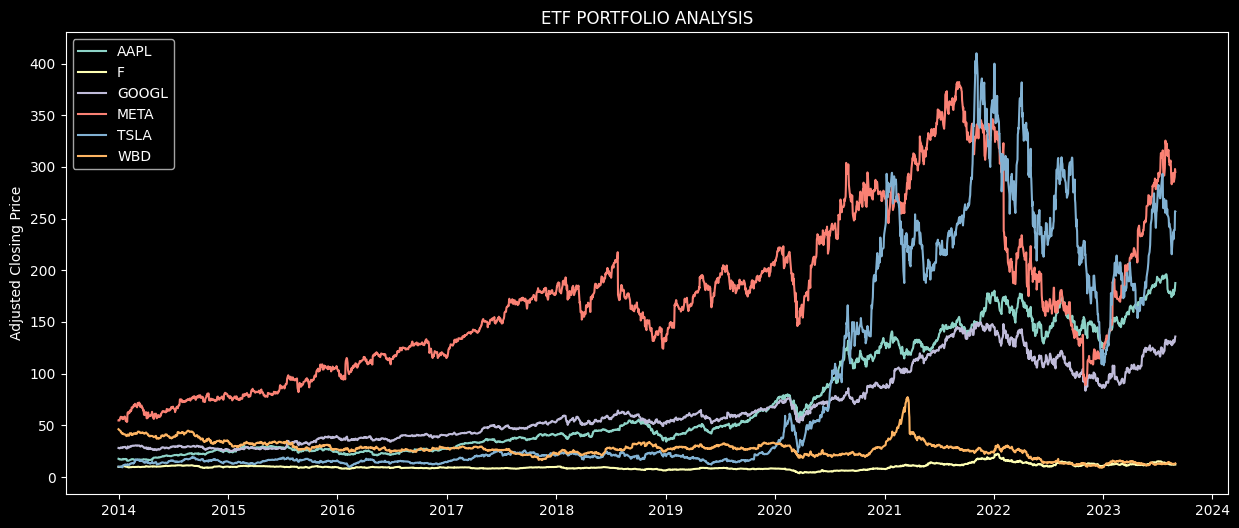

In [ ]:
mpl.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15,6))

labels = [x for x in etf.columns]

ax.plot(etf , label = labels)

plt.title("ETF PORTFOLIO ANALYSIS")
plt.ylabel('Adjusted Closing Price')

ax.legend()


In [ ]:
data = yf.download("AMZN AAPL GOOG", start="2023-01-01",
                    end="2023-09-06", group_by='tickers')
data

[*********************100%%**********************]  3 of 3 completed


AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-01-03   85.459999   86.959999   84.209999   85.820000   85.820000   
2023-01-04   86.550003   86.980003   83.360001   85.139999   85.139999   
2023-01-05   85.330002   85.419998   83.070000   83.120003   83.120003   
2023-01-06   83.029999   86.400002   81.430000   86.080002   86.080002   
2023-01-09   87.459999   89.480003   87.080002   87.360001   87.360001   
...                ...         ...         ...         ...         ...   
2023-08-29  133.380005  135.139999  133.250000  134.910004  134.910004   
2023-08-30  134.929993  135.679993  133.919998  135.070007  135.070007   
2023-08-31  135.059998  138.789993  135.000000  138.009995  138.009995   
2023-09-01  139.460007  139.960007  136.880005  138.119995  138.119995   
2023-09-05  137.729996  137.800003  135.820007  137.270004  137.270004   

                            GOOG                                      \
              Volume        Open        High         Low       Close   
Date                                                                   
2023-01-03  76706000   89.830002   91.550003   89.019997   89.699997   
2023-01-04  68885100   91.010002   91.239998   87.800003   88.709999   
2023-01-05  67930800   88.070000   88.209999   86.559998   86.769997   
2023-01-06  83303400   87.360001   88.470001   85.570000   88.160004   
2023-01-09  65266100   89.195000   90.830002   88.580002   88.800003   
...              ...         ...         ...         ...         ...   
2023-08-29  38646100  132.998001  137.294998  132.979996  135.490005   
2023-08-30  36137000  135.570007  137.250000  135.020996  136.929993   
2023-08-31  58781300  137.050003  138.399994  136.820007  137.350006   
2023-09-01  40948300  138.429993  138.580002  135.940002  136.800003   
2023-09-05  40636700  136.440002  137.369995  135.559998  136.710007   

                                        AAPL                          \
             Adj Close    Volume        Open        High         Low   
Date                                                                   
2023-01-03   89.699997  20738500  130.279999  130.899994  124.169998   
2023-01-04   88.709999  27046500  126.889999  128.660004  125.080002   
2023-01-05   86.769997  23136100  127.129997  127.769997  124.760002   
2023-01-06   88.160004  26612600  126.010002  130.289993  124.889999   
2023-01-09   88.800003  22996700  130.470001  133.410004  129.889999   
...                ...       ...         ...         ...         ...   
2023-08-29  135.490005  30803300  179.699997  184.899994  179.500000   
2023-08-30  136.929993  21773400  184.940002  187.850006  184.740005   
2023-08-31  137.350006  28147900  187.839996  189.119995  187.479996   
2023-09-01  136.800003  16665700  189.490005  189.919998  188.279999   
2023-09-05  136.710007  17730200  188.279999  189.979996  187.610001   

                                               
                 Close   Adj Close     Volume  
Date                                           
2023-01-03  125.070000  124.538658  112117500  
2023-01-04  126.360001  125.823189   89113600  
2023-01-05  125.019997  124.488876   80962700  
2023-01-06  129.619995  129.069321   87754700  
2023-01-09  130.149994  129.597061   70790800  
...                ...         ...        ...  
2023-08-29  184.119995  184.119995   53003900  
2023-08-30  187.649994  187.649994   60813900  
2023-08-31  187.869995  187.869995   60794500  
2023-09-01  189.460007  189.460007   45732600  
2023-09-05  189.699997  189.699997   45280000  

[169 rows x 18 columns]

In [ ]:
import pandas as pd

tickers_list = ["NE", "RIG", "HP", "SDRL", "PTEN", "BORR", "DO", "NBR", "PDS"] # example list
tickers_data= {} # empty dictionary

In [ ]:
for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]

    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

tickers_data

In [ ]:
combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()
combined_data

,level_0,level_1,Attribute,Recent
0,NE,0,address1,13135 Dairy Ashford
1,NE,1,address2,Suite 800
2,NE,2,city,Sugar Land
3,NE,3,state,TX
4,NE,4,zip,77478
...,...,...,...,...
1109,PDS,121,grossMargins,0.36327
1110,PDS,122,ebitdaMargins,0.28327
1111,PDS,123,operatingMargins,0.14007
1112,PDS,124,financialCurrency,CAD


In [ ]:
del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Recent"] # update column names

combined_data

In [ ]:
combined_df = combined_data[combined_data['Attribute']=='pegRatio']

#del combined_df["index"] # clean up unnecessary column

combined_df.sort_values('Recent', ascending = False)

count = 0

for i in combined_df['Recent']:
  count += i

avg_mean = count / len(combined_df)


-0.2783333333333334


,Ticker,Attribute,Recent
81,NE,pegRatio,0.27
203,RIG,pegRatio,-0.05
333,HP,pegRatio,0.07
576,PTEN,pegRatio,0.22
939,NBR,pegRatio,-1.85
1065,PDS,pegRatio,-0.33


In [ ]:
stock_list = ["NE", "RIG", "HP", "SDRL", "PTEN", "BORR", "DO", "NBR", "PDS"] # example list
stock_data = {} # empty dictionary

In [ ]:
stock_data['name'] = stock_list[0]


{'name': 'NE'}

In [ ]:
def get_stock(stock_name):
  import yfinance as yahooFinance
  stock_information = yahooFinance.Ticker(stock_name)

  for i in stock_information.info:
    if i != 'trailingPE':
      stock_information.info['trailingPE'] = stock_information.info['open']/stock_information.info['trailingEps']
      break

  stock_data[stock_name] = [stock_information.info['sector'], stock_information.info['trailingPE'], stock_information.info['beta']]





In [ ]:
get_stock('HP')

In [ ]:
stock_data

{'NE': ['Energy', 20.596, 1.210132],
 'RIG': ['Energy', -5.955882352941176, 2.990318],
 'HP': ['Energy', 11.31578947368421, 1.716804]}

In [ ]:
etf = pdr.get_data_yahoo(stock_list,
                         start = start,
                         end = end,
                         rounding = True)

etf = etf["Adj Close"]
etf.tail()

[*********************100%%**********************]  9 of 9 completed


,BORR,DO,HP,NBR,NE,PDS,PTEN,RIG,SDRL
Date,,,,,,,,,
2023-08-24,6.95,14.53,40.10,108.07,49.97,64.01,13.99,7.61,47.93
2023-08-25,6.94,14.56,40.34,108.46,50.26,64.46,13.93,7.72,48.48
2023-08-28,7.00,14.32,40.50,110.70,50.40,65.23,13.93,7.72,48.38
2023-08-29,7.09,14.33,40.78,112.17,50.64,65.94,14.17,7.94,48.44
2023-08-30,7.17,14.90,40.43,111.96,52.09,65.76,13.95,8.17,48.74


In [ ]:
import yfinance as yahooFinance
GetFacebookInformation = yahooFinance.Ticker("BORR")

# get all key value pairs that are available
for key, value in GetFacebookInformation.info.items():
    print(key, ":", value)

address1 : S. E. Pearman Building
address2 : 2nd Floor 9 Par-la-Ville Road
city : Hamilton
zip : HM11
country : Bermuda
phone : 441 542 9234
website : https://borrdrilling.com
industry : Oil & Gas Drilling
industryDisp : Oil & Gas Drilling
sector : Energy
sectorDisp : Energy
longBusinessSummary : Borr Drilling Limited operates as an offshore drilling contractor to the oil and gas industry worldwide. The company owns, contracts, and operates jack-up drilling rigs for operations in shallow-water areas, including the provision of related equipment and work crews to conduct oil and gas drilling and workover operations for exploration and production. It serves oil and gas exploration and production companies, such as integrated oil companies, state-owned national oil companies, and independent oil and gas companies. The company was formerly known as Magni Drilling Limited and changed its name to Borr Drilling Limited in December 2016. Borr Drilling Limited was incorporated in 2016 and is ba